# Email spam final prediction

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import joblib as jb
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [2]:
ordinal_encode_model=jb.load('D:/DS NOTE/OASIS INFO BYTE/Email Spam Detection/file/train/model/ordinal_encode_model.pkl')
model=jb.load('D:/DS NOTE/OASIS INFO BYTE/Email Spam Detection/file/train/model/dtc_model.pkl')

In [3]:
def flow(X_path):
    # read
    data=pd.read_csv(X_path)
    #duplicate remove
    data.drop_duplicates()
    #drop columns
    df=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
    # Rename
    df=df.rename(columns={'v1': 'Label','v2':'Message'})
    #Data split
    X=df.drop('Label',axis=1).copy()
    y=df['Label'].copy()
    #mapping
    Y=y.replace({'spam':0,'ham':1})
    #encoding
    ordinal_encode=ordinal_encode_model.transform(X)
    ordinal_encode_df=pd.DataFrame(ordinal_encode,columns=X.columns)
    #prediction
    y_pred=pd.DataFrame(model.predict(ordinal_encode_df))
    Y_pred=y_pred.replace({0:'spam',1:'ham'})
    Y_pred=Y_pred.rename(columns={0: 'Label'})
    #metrices
    report=classification_report(y_pred,Y)
    cm=confusion_matrix(y_pred,Y)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)


    return Y_pred,report,cm,disp

In [4]:
X_test_path ='D:/DS NOTE/OASIS INFO BYTE/Email Spam Detection/test/raw/test.csv'
Y_pred,report,cm,disp=flow(X_test_path)

In [5]:
Y_pred

,Label
0,ham
1,ham
2,ham
3,ham
4,ham
...,...
2781,ham
2782,ham
2783,ham
2784,ham


In [6]:
print(report)

              precision    recall  f1-score   support

           0       0.10      0.84      0.18        45
           1       1.00      0.87      0.93      2741

    accuracy                           0.87      2786
   macro avg       0.55      0.86      0.55      2786
weighted avg       0.98      0.87      0.92      2786



In [7]:
cm

array([[  38,    7],
       [ 347, 2394]], dtype=int64)

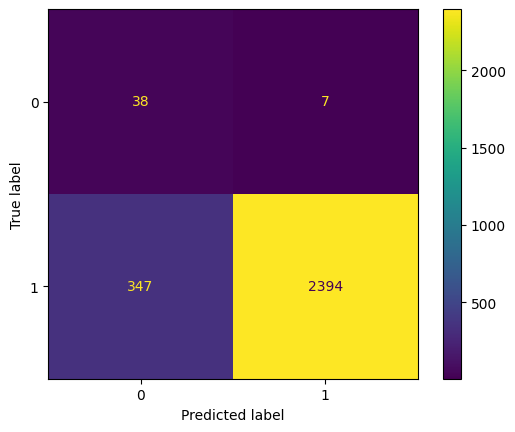

In [8]:
disp.plot()